In [23]:
import numpy as np
import pandas as pd
import scipy.io as sio
from skimage import io
from sklearn.metrics import classification_report  #这个包是评价报告
import matplotlib.pyplot as plt  #加油！！！珍惜时间～～～
import seaborn as sns    # for plot figure

In [2]:
data_1=sio.loadmat('/Users/yangguangqiang/Music/career-2021/ML-startup/吴恩达/ML-homework-main/ex7-kmeans and PCA/data/ex7data2.mat')
data_x=data_1['X']
df_1=pd.DataFrame(data_x,columns=['x1','x2'])
df_1.head()

,x1,x2
0,1.842080,4.607572
1,5.658583,4.799964
2,6.352579,3.290854
3,2.904017,4.612204
4,3.231979,4.939894


/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


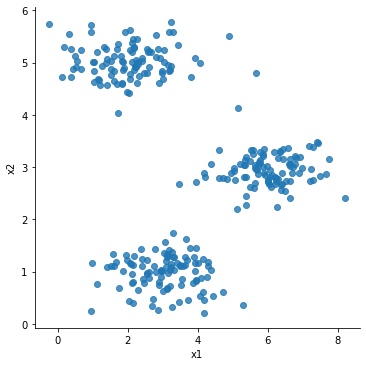

In [3]:
sns.lmplot('x1','x2', data=df_1, fit_reg=False)
plt.show()

In [4]:
## realize SK-means by hand

In [5]:
def find_cluster(x,centroids):
    distances = np.apply_along_axis(func1d=np.linalg.norm,  # np.linalg.norm =(x1^2+x2^2+x3^2+...)^0.5
                                    axis=1,    #行方向求
                                    arr=centroids - x)  # use ndarray's broadcast
    return np.argmin(distances)      #return min distance's index
def assign_cluster(data,centroids):
    return np.apply_along_axis(lambda x: find_cluster(x, centroids), axis=1, arr=data.values)

In [6]:
def combine_data_C(data, C):   #plus 一列 “C” 的数据
    data_with_c = data.copy()
    data_with_c['C'] = C    
    return data_with_c

In [7]:
def update_Centroids(data, C):   # C: 每个点对应的现在的 cluster
    data_with_c = combine_data_C(data, C)
    return data_with_c.groupby('C', as_index=False).mean().sort_values(by='C').drop('C', axis=1).values

In [8]:
def Init_Centroids(data,k):  # random choose k training examples
    return data.sample(k).values    # “sample” : 从data中随机抽取k个元素

In [9]:
def run_Kmeans(data,k,epoch=100,tol=0.0001):    # 单次的 K-means ,只有一次初始化
    centroids=Init_Centroids(data,k)
    cost_list=[]
    
    for i in range(epoch):
        C=assign_cluster(data,centroids)
        centroids=update_Centroids(data, C)
        cost_list.append(cost_function(data,centroids,C))        
    return C, centroids, cost_list[-1]

In [10]:
def cost_function(data,centroids,C):    # 避免local最优，进行多次，根据cost大小选择最优的一次
    m=data.shape[0]        
    data_cluster = centroids[C]      # 每一个点 central的坐标；C：第几个cluster ；centroids：所有中心的坐标
    distances = np.apply_along_axis(func1d=np.linalg.norm, axis=1, 
                                    arr=data.values-data_cluster)
    return distances.sum()/m

In [11]:
def multi_Kmeans(data,k,epoch=100,n_init=10):  
    tries = np.array([run_Kmeans(data, k, epoch) for _ in range(n_init)])
    least_index = np.argmin(tries[:, -1])   
    return tries[least_index]

### apply above functions on 2D problem

In [15]:
best_C, best_centroids, least_cost = multi_Kmeans(df_1,3,epoch=100,n_init=10)

<ipython-input-11-a8e6f0a3f0e9>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tries = np.array([run_Kmeans(data, k, epoch) for _ in range(n_init)])


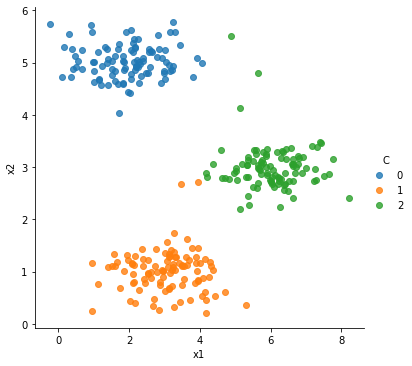

In [17]:
data_with_c = combine_data_C(df_1, best_C)
sns.lmplot('x1', 'x2', hue='C', data=data_with_c, fit_reg=False)
plt.show()

In [ ]:
## use sklearn package

In [20]:
from sklearn.cluster import KMeans
sk_kmeans = KMeans(n_clusters=3)
sk_kmeans.fit(df_1)
pre_sklearn=sk_kmeans.predict(df_1)
pre_sklearn

array([1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1], d

/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


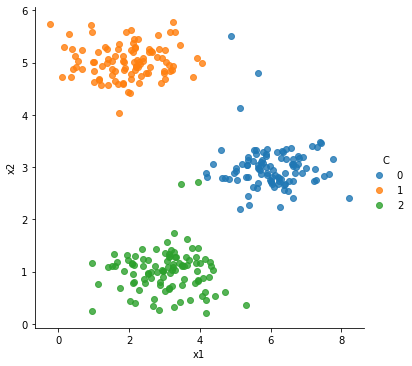

In [21]:
sk_with_c = combine_data_C(df_1, pre_sklearn)
sns.lmplot('x1', 'x2', hue='C', data=sk_with_c, fit_reg=False)
plt.show()

### apply above functions on images

In [28]:
data_2=io.imread('/Users/yangguangqiang/Music/career-2021/ML-startup/吴恩达/ML-homework-main/ex7-kmeans and PCA/data/pic.png')/255
df_2=pd.DataFrame(data_2.reshape(564*700, 3))
df_2

,0,1,2
0,0.784314,0.792157,0.749020
1,0.776471,0.784314,0.741176
2,0.780392,0.788235,0.745098
3,0.792157,0.800000,0.756863
4,0.827451,0.835294,0.792157
...,...,...,...
394795,0.631373,0.686275,0.635294
394796,0.631373,0.682353,0.643137
394797,0.639216,0.690196,0.654902
394798,0.643137,0.694118,0.666667


In [29]:
C_2,centroids_2,cost_2 = multi_Kmeans(df_2,16,epoch=10,n_init=3)

<ipython-input-11-a8e6f0a3f0e9>:2: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  tries = np.array([run_Kmeans(data, k, epoch) for _ in range(n_init)])


In [31]:
compressed_pic = centroids_2[C_2].reshape((564,700,3))

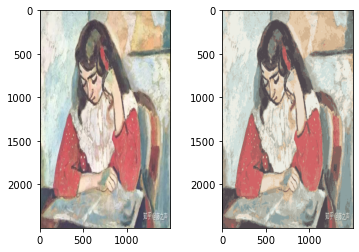

In [44]:
import cv2
fig, ax = plt.subplots(1, 2)
Data=cv2.resize(data_2, (1500,2500))
ax[0].imshow(Data)
ax[1].imshow(cv2.resize(compressed_pic, (1500,2500)))
plt.show()